In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
Data = pd.read_csv('diabetes.csv')
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
x = pd.DataFrame(Data, columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
y = Data.Outcome.values.reshape(-1,1)
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)


In [21]:
clf = DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [22]:
print('Accuracy :',metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.7857142857142857


# Visualization


In [23]:
from sklearn import tree 

In [24]:
text_representation =tree.export_text(clf)
print(text_representation)


|--- feature_0 <= 127.50
|   |--- feature_6 <= 28.50
|   |   |--- feature_4 <= 45.40
|   |   |   |--- class: 0
|   |   |--- feature_4 >  45.40
|   |   |   |--- class: 1
|   |--- feature_6 >  28.50
|   |   |--- feature_0 <= 99.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  99.50
|   |   |   |--- class: 0
|--- feature_0 >  127.50
|   |--- feature_4 <= 29.95
|   |   |--- feature_0 <= 145.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  145.50
|   |   |   |--- class: 1
|   |--- feature_4 >  29.95
|   |   |--- feature_0 <= 154.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  154.50
|   |   |   |--- class: 1



In [25]:
with open('decistion_tree.log','w') as fout:
    fout.write(text_representation)

# Plot Tree with plot_tree

# 

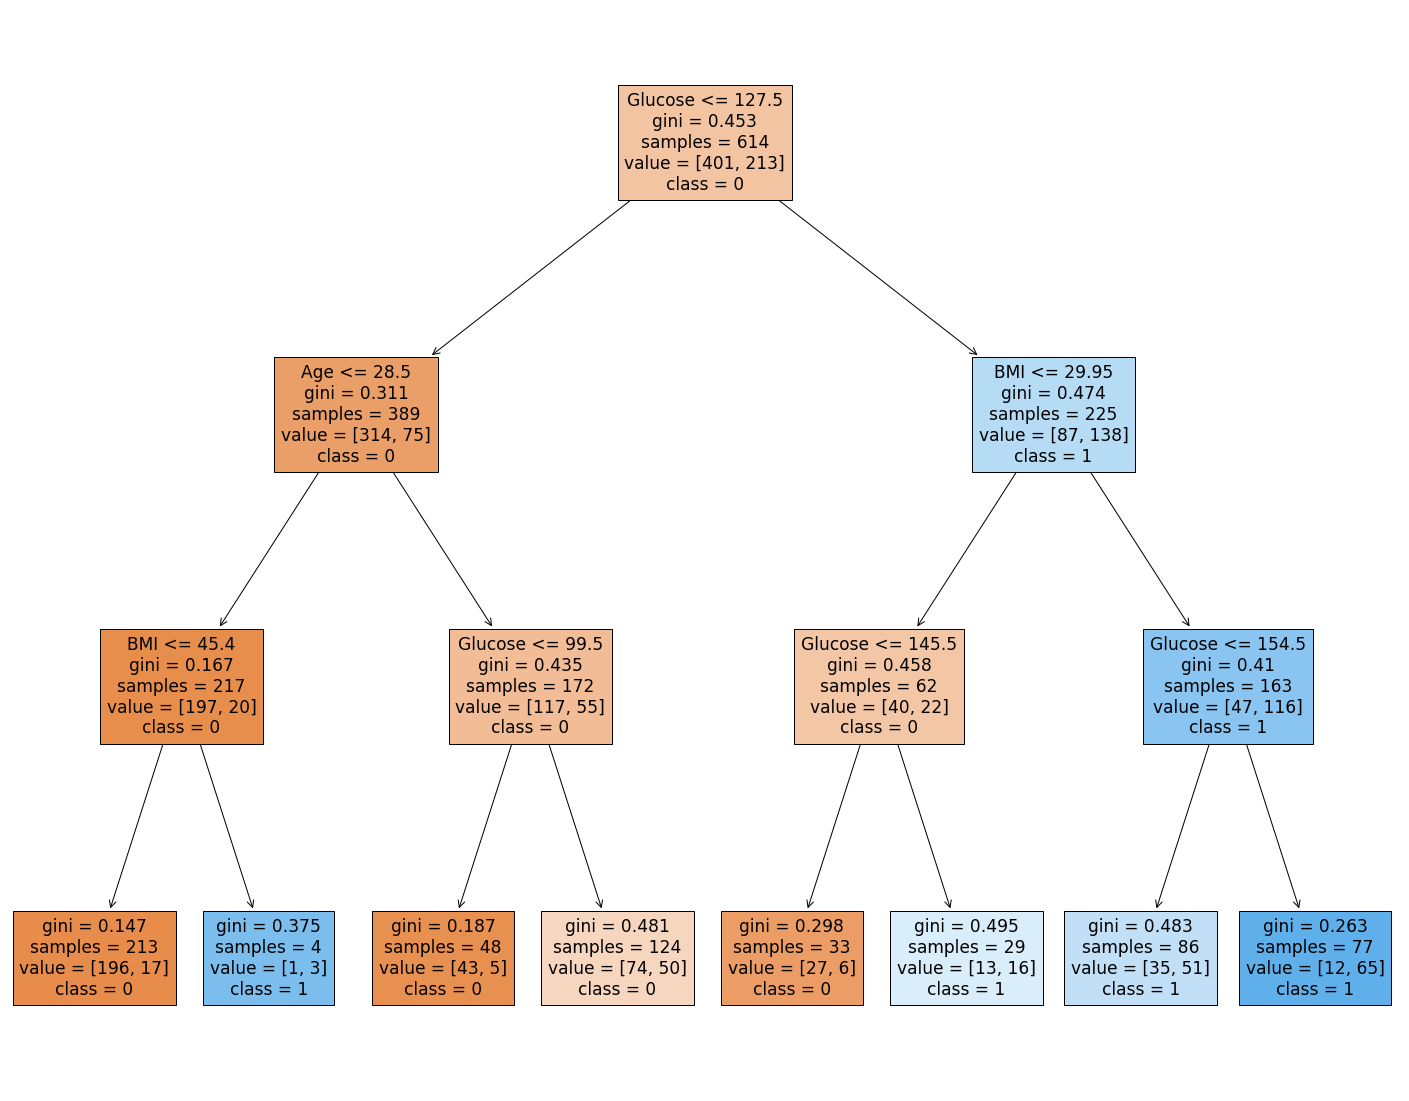

In [26]:
feature_names = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_names = ['0','1']
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(clf,
                      feature_names=feature_names,
                      class_names=target_names,
                     filled=True)

fig.savefig('Tree1.png')

In [27]:
clf = DecisionTreeClassifier(criterion= 'entropy',max_depth = 3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [28]:
print('Accuracy :',metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.7987012987012987


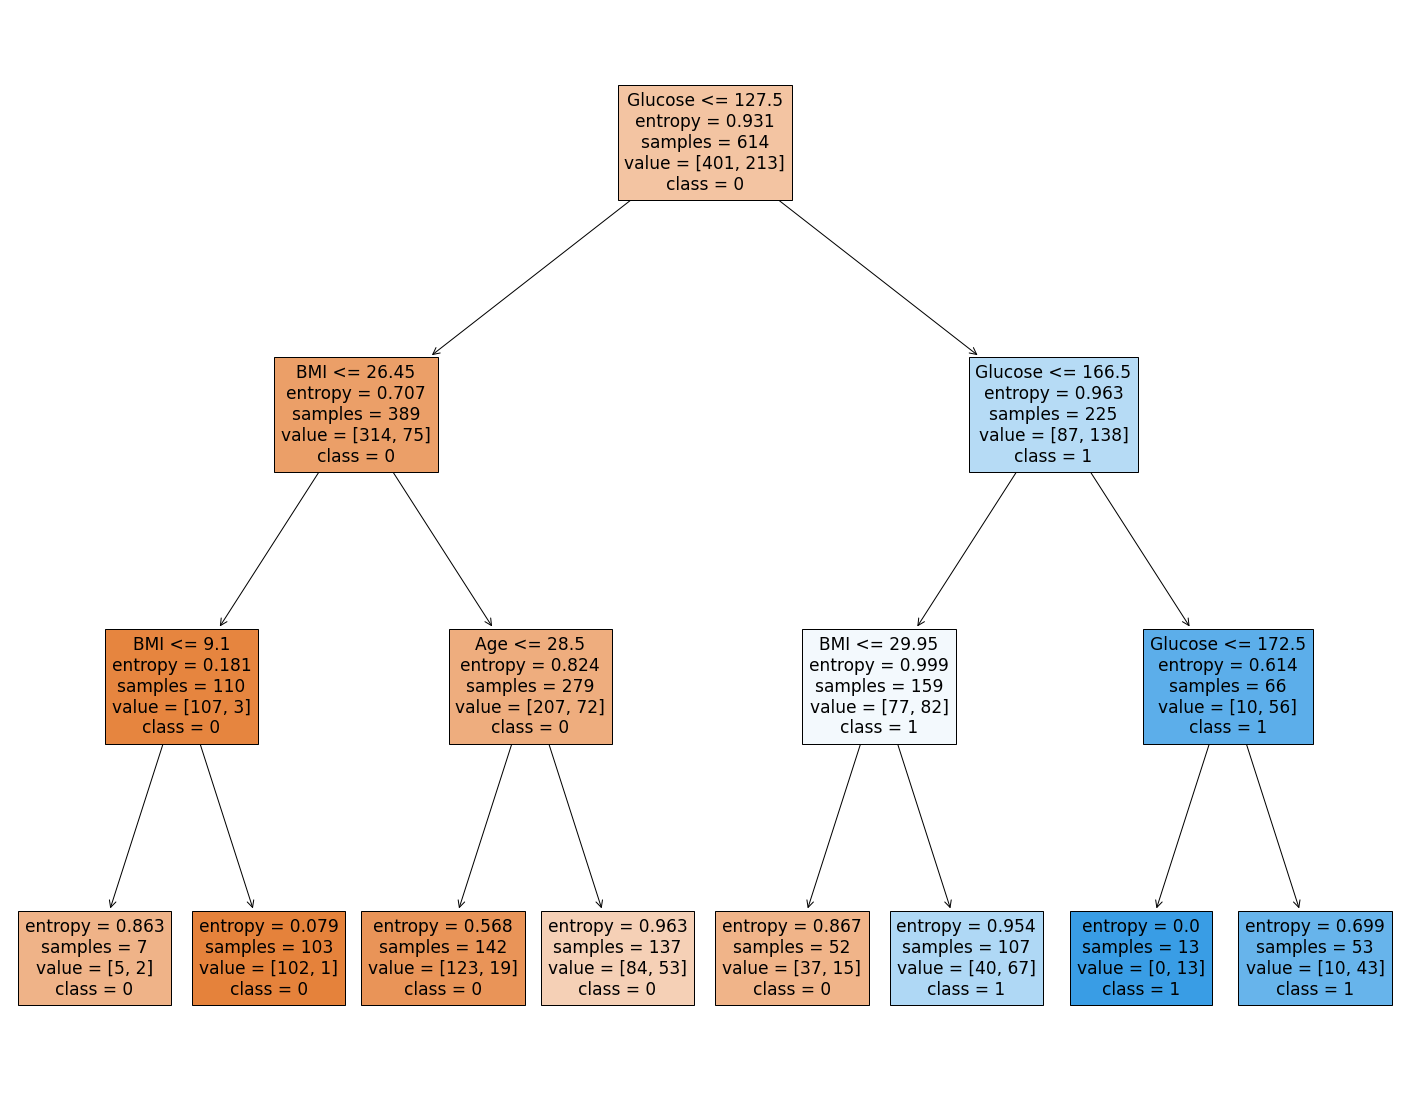

In [29]:
feature_names = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_names = ['0','1']
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(clf,
                      feature_names=feature_names,
                      class_names=target_names,
                     filled=True)

fig.savefig('Tree1.png')